# Data Cleaning and Validation

To ensure data quality and reliability for future analysis and machine learning, several data validation and cleaning steps were taken for each of the columns in the data frame.

## Time related columns

In the DataFrame, four columns contained datetime information: *date*, *time*, *feeding_time*, and *feeding_date*. The date and time columns were merged to create an observation datetime (*observation_dt*) column, while *feeding_time* and *feeding_date* were combined into a feeding datetime column (*feeding_dt*).

Additionally, a new column named *feeding_timegap* was introduced to calculate the time elapsed between each observation and the feeding datetime. The integrity of this column was verified to ensure it contained no negative values or outliers by visualizing its distribution using a plot.

Another column, *duration*, represented the duration of time each observed bird spent at the feeding station. This column was formatted, transformed into a timedelta data type, and visualized for validation purposes. Two rows that lacked duration values were removed. Ultimately, the column now stores the total minutes spent at the feeding station as integers.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the csv file as a dataframe df
df = pd.read_csv("feedingstation.csv")

# Check overall dataframe inforamtion
display(df.head())
df.info()

,date,time,bird,food,weight,temperature,weather,rain,wind,count,eats,duration,food_taken,feeding_date,feeding_time
0,8082017,8:09,Bird 10,Feed 1,"55,5",23,sunny,No,light,4.0,Yes,0:26,NaN,5082017,14:25
1,9082017,8:08,Bird 10,Feed 1,"55,5",22,sunny,No,light,4.0,Yes,0:01,NaN,5082017,14:25
2,10082017,14:46,Bird 10,Feed 1,"55,5",34,sunny,No,light,3.0,No,0:01,NaN,5082017,14:25
3,11082017,7:36,Bird 10,Feed 1,"55,5",19,sunny,No,light,4.0,Yes,0:29,NaN,5082017,14:25
4,11082017,15:32,Bird 10,Feed 1,"55,5",34,cloudy,Yes,light,4.0,Yes,0:02,NaN,5082017,14:25


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2308 entries, 0 to 2307
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          2308 non-null   int64  
 1   time          2307 non-null   object 
 2   bird          2307 non-null   object 
 3   food          2308 non-null   object 
 4   weight        2207 non-null   object 
 5   temperature   2308 non-null   int64  
 6   weather       2307 non-null   object 
 7   rain          2308 non-null   object 
 8   wind          2307 non-null   object 
 9   count         2307 non-null   float64
 10  eats          2305 non-null   object 
 11  duration      2306 non-null   object 
 12  food_taken    126 non-null    object 
 13  feeding_date  2308 non-null   int64  
 14  feeding_time  2308 non-null   object 
dtypes: float64(1), int64(3), object(11)
memory usage: 270.6+ KB


In [53]:
# Create a column that combines the date and time of each observation with dt type
# Convert 'time' column to use colons instead of dots
df['time'] = df['time'].str.replace(".", ":", regex=False)

# Modify 'date' column to correct the year and add leading zeros
df['date'] = df['date'].astype('string')
df['date'] = df['date'].str.replace("7023", "2023", regex=False)
df['date'] = df['date'].str.zfill(8)

# Combine 'date' and 'time' columns into a new 'observation_dt' column
df['observation_dt'] = df['date'] + df['time']

# Convert 'observation_dt' to datetime format
df['observation_dt'] = pd.to_datetime(df['observation_dt'], format="%d%m%Y%H:%M")

# Create a column that combines the date and time of each feeding with dt type
# Modify 'feeding_date' to add leading zeros
df['feeding_date'] = df['feeding_date'].astype('string')
df['feeding_date'] = df['feeding_date'].str.zfill(8)

# Combine 'feeding_date' and 'feeding_time' columns into a new 'feeding_dt' column
df['feeding_dt'] = df['feeding_date'] + df['feeding_time']

# Convert 'feeding_dt' to datetime format
df['feeding_dt'] = pd.to_datetime(df['feeding_dt'], format="%d%m%Y%H:%M")

# Drop unnecessary columns
df.drop(["date", 'time', 'feeding_date', 'feeding_time'], axis=1, inplace=True)

# Create a new column with the timespan between feeding and obsertation time
# Calculate the time interval between 'observation_dt' and 'feeding_dt'
df["feeding_timegap"] = df['observation_dt'] - df['feeding_dt']

# Display the first few rows and DataFrame info
display(df.head())
df.info()

,bird,food,weight,temperature,weather,rain,wind,count,eats,duration,food_taken,observation_dt,feeding_dt,feeding_timegap
0,Bird 10,Feed 1,"55,5",23,sunny,No,light,4.0,Yes,0:26,NaN,2017-08-08 08:09:00,2017-08-05 14:25:00,2 days 17:44:00
1,Bird 10,Feed 1,"55,5",22,sunny,No,light,4.0,Yes,0:01,NaN,2017-08-09 08:08:00,2017-08-05 14:25:00,3 days 17:43:00
2,Bird 10,Feed 1,"55,5",34,sunny,No,light,3.0,No,0:01,NaN,2017-08-10 14:46:00,2017-08-05 14:25:00,5 days 00:21:00
3,Bird 10,Feed 1,"55,5",19,sunny,No,light,4.0,Yes,0:29,NaN,2017-08-11 07:36:00,2017-08-05 14:25:00,5 days 17:11:00
4,Bird 10,Feed 1,"55,5",34,cloudy,Yes,light,4.0,Yes,0:02,NaN,2017-08-11 15:32:00,2017-08-05 14:25:00,6 days 01:07:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2308 entries, 0 to 2307
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   bird             2307 non-null   object         
 1   food             2308 non-null   object         
 2   weight           2207 non-null   object         
 3   temperature      2308 non-null   int64          
 4   weather          2307 non-null   object         
 5   rain             2308 non-null   object         
 6   wind             2307 non-null   object         
 7   count            2307 non-null   float64        
 8   eats             2305 non-null   object         
 9   duration         2306 non-null   object         
 10  food_taken       126 non-null    object         
 11  observation_dt   2307 non-null   datetime64[ns] 
 12  feeding_dt       2308 non-null   datetime64[ns] 
 13  feeding_timegap  2307 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), fl

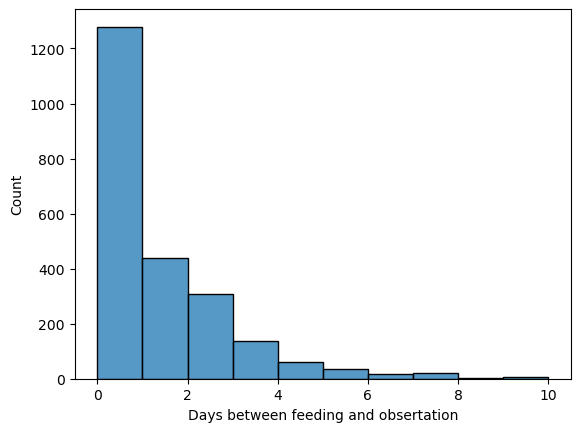

In [54]:
# Convert 'feeding_timegap' to days as a float
feeding_timegap_days = df['feeding_timegap'].astype('timedelta64[D]').astype('float')

# Create a histogram plot of 'D' with 10 bins
sns.histplot(feeding_timegap_days, bins=10)
plt.xlabel("Days between feeding and obsertation")
plt.show()

2

0

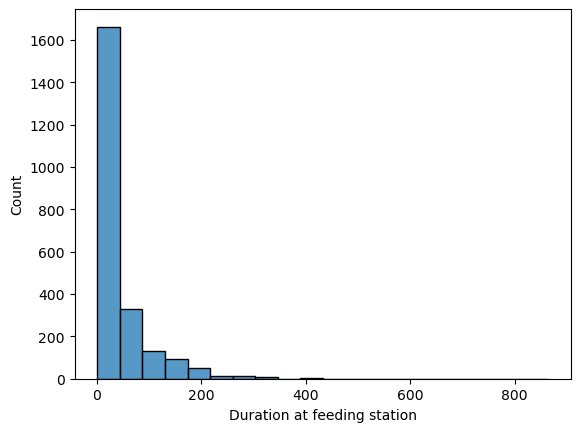

,bird,food,weight,temperature,weather,rain,wind,count,eats,duration,food_taken,observation_dt,feeding_dt,feeding_timegap
0,Bird 10,Feed 1,"55,5",23,sunny,No,light,4.0,Yes,26,NaN,2017-08-08 08:09:00,2017-08-05 14:25:00,2 days 17:44:00
1,Bird 10,Feed 1,"55,5",22,sunny,No,light,4.0,Yes,1,NaN,2017-08-09 08:08:00,2017-08-05 14:25:00,3 days 17:43:00
2,Bird 10,Feed 1,"55,5",34,sunny,No,light,3.0,No,1,NaN,2017-08-10 14:46:00,2017-08-05 14:25:00,5 days 00:21:00
3,Bird 10,Feed 1,"55,5",19,sunny,No,light,4.0,Yes,29,NaN,2017-08-11 07:36:00,2017-08-05 14:25:00,5 days 17:11:00
4,Bird 10,Feed 1,"55,5",34,cloudy,Yes,light,4.0,Yes,2,NaN,2017-08-11 15:32:00,2017-08-05 14:25:00,6 days 01:07:00


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2306 entries, 0 to 2307
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   bird             2306 non-null   object         
 1   food             2306 non-null   object         
 2   weight           2206 non-null   object         
 3   temperature      2306 non-null   int64          
 4   weather          2306 non-null   object         
 5   rain             2306 non-null   object         
 6   wind             2306 non-null   object         
 7   count            2306 non-null   float64        
 8   eats             2304 non-null   object         
 9   duration         2306 non-null   int32          
 10  food_taken       126 non-null    object         
 11  observation_dt   2306 non-null   datetime64[ns] 
 12  feeding_dt       2306 non-null   datetime64[ns] 
 13  feeding_timegap  2306 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), fl

None

In [55]:
# Adjust the format of the duration column to be transformed into timedelta type
df['duration'] = df['duration'].str.zfill(5)
df['duration'] = df['duration'] + ":00"
df['duration'] = df['duration'].str.replace(">", ":", regex=False)

# Convert 'duration' column to timedelta format
df["duration"] = pd.to_timedelta(df["duration"])

# Convert timedelta values to total minutes
df["duration"] = df['duration'].apply(lambda x: x.total_seconds() // 60)

# Display missing vales for each column
display(df["duration"].isna().sum())

# Remove rows with NaN values in the 'duration' column
df.dropna(subset='duration', inplace=True)

# Convert 'duration' values to integers
df["duration"] = df['duration'].astype("int")

# Display missing vales for each column after removing missing duration values
display(df["duration"].isna().sum())

# Create a histogram plot of 'duration' with 20 bins
sns.histplot(df['duration'], bins=20)
plt.xlabel("Duration at feeding station")
plt.show()

# Display the first few rows of the DataFrame
display(df.head())
display(df.info())

## Categorical Columns

- The *bird* column contains information about the observed bird types. To protect data rights, bird species are represented by numeric codes instead of specific names.

- In the *food* column, information about available food types is recorded, similarly protected for data rights with numeric codes instead of names. Blank spaces at the end of Feed 2 category was striped.

- The *weather* column describes the weather conditions observed during each data point.

- The *wind* column specifies the strength of the wind during observations.

For these four columns, it was evident that they contained a limited set of recurring values. To enhance efficiency in subsequent analysis and optimize storage, these columns were converted to the categorical data type after an initial data validation step.

In [56]:
# List of categorical columns to inspect
categorical_columns = ['bird', 'food', 'weather', 'wind']

# Print value counts for each categorical column
for i in categorical_columns:
    print(df[i].value_counts())

# Remove blank spaces from food values
df['food'] = df['food'].str.strip()    
    
# Convert categorical columns to the 'category' data type
for i in categorical_columns:
    df[i] = df[i].astype('category')

# Display DataFrame information after conversion
display(df.dtypes)

Bird 10    650
Bird 6     646
Bird 3     532
Bird 11    244
Bird 9     199
Bird 12     14
Bird 4       5
Bird 2       5
Bird 8       3
Bird 13      3
Bird 7       3
Bird 1       1
Bird 5       1
Name: bird, dtype: int64
Feed 1     2200
Feed 3       71
Feed 2       30
Feed 2        5
Name: food, dtype: int64
partly cloudy    1169
sunny             762
cloudy            363
fog                 9
snow                3
Name: weather, dtype: int64
light       1145
strong       736
moderate     425
Name: wind, dtype: int64


bird                      category
food                      category
weight                      object
temperature                  int64
weather                   category
rain                        object
wind                      category
count                      float64
eats                        object
duration                     int32
food_taken                  object
observation_dt      datetime64[ns]
feeding_dt          datetime64[ns]
feeding_timegap    timedelta64[ns]
dtype: object

## Boolean-like Columns

- The *rain* column specifies wether it was raining or not during the observation.

- In the *eats* column, information about wether the bird ate food from the feeding station or not is recorded.

- The *food_taken* column describes wether the bird in the observation took some food with it after leaving the feeding station or not.

For these three variable it was deemed suitable to treat them as boolean since they only contain True or False kind of values. After filling missing values with False for the *food_taken* column (since it was only only recorded when birds took the food with them) and removing two rows missing values for the *eats* variable, the columns were set to boolean type to enhance efficiency in subsequent analysis and optimize storage.

In [57]:
# Display DataFrame information
display(df.info())

# Drop rows with missing values in the 'eats' column
df.dropna(subset='eats', inplace=True)

# Display value counts for the 'food_taken' column
display(df['food_taken'].value_counts())

# Fill missing values in 'food_taken' column with 'No'
df['food_taken'].fillna('No', inplace=True)

# List of boolean columns to inspect
boolean_columns = ['rain', 'eats', 'food_taken']

# Print value counts for each boolean column
for i in boolean_columns:
    print(df[i].value_counts())
    
    # Convert the column to boolean type
    df[i] = df[i].map({'Yes': True, 'No': False})

# Display data types of the boolean columns after conversion
display(df[boolean_columns].dtypes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2306 entries, 0 to 2307
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   bird             2306 non-null   category       
 1   food             2306 non-null   category       
 2   weight           2206 non-null   object         
 3   temperature      2306 non-null   int64          
 4   weather          2306 non-null   category       
 5   rain             2306 non-null   object         
 6   wind             2306 non-null   category       
 7   count            2306 non-null   float64        
 8   eats             2304 non-null   object         
 9   duration         2306 non-null   int32          
 10  food_taken       126 non-null    object         
 11  observation_dt   2306 non-null   datetime64[ns] 
 12  feeding_dt       2306 non-null   datetime64[ns] 
 13  feeding_timegap  2306 non-null   timedelta64[ns]
dtypes: category(4), datetime

None

Yes    126
Name: food_taken, dtype: int64

No     2278
Yes      26
Name: rain, dtype: int64
Yes    2073
No      231
Name: eats, dtype: int64
No     2178
Yes     126
Name: food_taken, dtype: int64


rain          bool
eats          bool
food_taken    bool
dtype: object

## Numerical columns 

- The *weight* column contains information about the mass of food that was made available to the birds in grams. The variable was converted into a float type. During data validation it was noticed that some values in the weight column were missing. Missing values in this column were replaced with its median value. The distribution was plotted to detect potential errors or outliers. 

- The *temperature* column specifies the temperature in celsius degrees that was recorded during the observation. The distribution was plotted to detect potential errors or outliers. This column did not need any modifications.

- The *count* column specifies amount of birds of the same species in the observation. To improve analytical convenience, it was determined that representing each bird individually in the DataFrame, with as many rows as its count value, would be more suitable. The column was subsequently deleted from the DataFrame.

Finally, the index was reset to ensure that the index is sequential and to avoid any potential errors when accessing the data. The summary of the data types of all columns was displayed again to confirm the desired changes had been made correctly. By executing these data validation and cleaning steps, a reliable and robust dataset is created, free from missing values and unnecessary features, setting the groundwork for meaningful analysis and effective machine learning models.

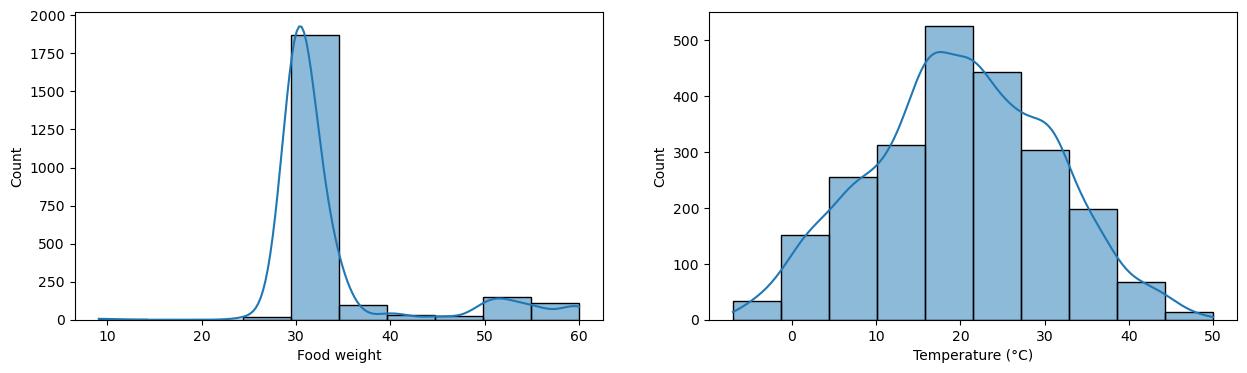

,bird,food,weight,temperature,weather,rain,wind,eats,duration,food_taken,observation_dt,feeding_dt,feeding_timegap
0,Bird 10,Feed 1,55.5,23,sunny,False,light,True,26,False,2017-08-08 08:09:00,2017-08-05 14:25:00,2 days 17:44:00
1,Bird 10,Feed 1,55.5,23,sunny,False,light,True,26,False,2017-08-08 08:09:00,2017-08-05 14:25:00,2 days 17:44:00
2,Bird 10,Feed 1,55.5,23,sunny,False,light,True,26,False,2017-08-08 08:09:00,2017-08-05 14:25:00,2 days 17:44:00
3,Bird 10,Feed 1,55.5,23,sunny,False,light,True,26,False,2017-08-08 08:09:00,2017-08-05 14:25:00,2 days 17:44:00
4,Bird 10,Feed 1,55.5,22,sunny,False,light,True,1,False,2017-08-09 08:08:00,2017-08-05 14:25:00,3 days 17:43:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6352 entries, 0 to 6351
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   bird             6352 non-null   category       
 1   food             6352 non-null   category       
 2   weight           6352 non-null   float64        
 3   temperature      6352 non-null   int64          
 4   weather          6352 non-null   category       
 5   rain             6352 non-null   bool           
 6   wind             6352 non-null   category       
 7   eats             6352 non-null   bool           
 8   duration         6352 non-null   int32          
 9   food_taken       6352 non-null   bool           
 10  observation_dt   6352 non-null   datetime64[ns] 
 11  feeding_dt       6352 non-null   datetime64[ns] 
 12  feeding_timegap  6352 non-null   timedelta64[ns]
dtypes: bool(3), category(4), datetime64[ns](2), float64(1), int32(1), int64(1), ti

None

In [58]:
# Clean 'weight' column: Replace comma with period and convert to float
df['weight'] = df['weight'].str.replace(",", ".", regex=False)
df['weight'] = df['weight'].astype("float")

# Fill missing values in weight column with the median
weight_median = df['weight'].median()
df['weight'] = df['weight'].fillna(weight_median)

# Create subplots for two histogram plots side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Plot histogram and kernel density estimation for 'weight'
sns.histplot(df['weight'], ax=axes[0], kde=True, bins=10)
axes[0].set_xlabel("Food weight")

# Plot histogram and kernel density estimation for 'temperature'
sns.histplot(df['temperature'], ax=axes[1], kde=True, bins=10)
axes[1].set_xlabel("Temperature (°C)")

# Display the plots
plt.show()

# Duplicate rows based on the 'count' column
df = df.loc[df.index.repeat(df['count'])]

# Reset the index to have consecutive row numbers if needed and drop count column
df.reset_index(drop=True, inplace=True)
df.drop('count', axis=1, inplace=True)

# Display the DataFrame and column information
display(df.head())
display(df.info())

# Export clean final df as csv
df.to_csv('bird_df_clean.csv',index=False) 

import pickle

# Save DataFrame to a file
with open('df.pkl', 'wb') as file:
    pickle.dump(df, file)